In [1]:
import stumpy
import matplotlib.dates as dates
from matplotlib.patches import Rectangle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import prep
#from tsfresh.utilities.dataframe_functions import roll_time_series

In [4]:
# This loops over the main pdf file page by page, saving each page as a csv in the /pages directory
# THIS MIGHT TAKE SOME TIME IF THE FILE IS LARGE
print(len(tmpPages)," pages to be converted.") # Here is our list of pages.

# This for loop takes the list of pages in the PDF from the previous cell.
# This loop also converts the PDF into individual CSVs and saves them to /pages
for i in tmpPages:
    print("Converting page: "+str(i))
    tb.convert_into(infile,
                    "../pages/page-"+str(i)+".csv",
                    guess=True,
                    output_format="CSV",
                    stream=True,
                    pages=i,
                    silent=True)
        
print("Done!")

NameError: name 'tmpPages' is not defined

In [ ]:
(United States 1200 1200 918 1000 48000
Australia 885 900 427 450 793000
Canada 585 590 e290 300 9800
Chile 5730 5600 2330 2200 200000
China 1720 1800 10000 10000 26000
Congo (Kinshasa) 1600 1800 1350 1500 31000
Germany — — 643 630 —
Indonesia 505 810 269 270 24,000
Japan — — 1580 1500 —
Kazakhstan 552 520 515 470 20,000
Korea, Republic of — — 671 650 —
Mexico 733 720 492 470 53,000
Peru 2,150 2,200 324 350 77,000
Poland 393 390 560 590 31,000
Russia e810 820 1040 920 62000
Zambia 853 830 378 350 21,000
Other countries 2840 2800 3450 4300 180000
World total (rounded) 20600 21000 25300 26000 880000)

In [3]:
cars = pd.read_csv('total_vehicle_sales.csv')

In [4]:
cars.head()

,DATE,TOTALSA
0,1976-01-01,12.814
1,1976-02-01,13.340
2,1976-03-01,13.378
3,1976-04-01,13.223
4,1976-05-01,12.962


In [5]:
cars.shape

(560, 2)

In [6]:
cars.dtypes

DATE        object
TOTALSA    float64
dtype: object

In [7]:
# Reassign the sale_date column to be a datetime type
cars.DATE = pd.to_datetime(cars.DATE)

# Sort rows by the date and then set the index as that date
cars = cars.set_index("DATE").sort_index()


In [8]:
cars.dtypes

TOTALSA    float64
dtype: object

In [9]:
m = 30
mp = stumpy.stump(cars['TOTALSA'], m)

In [10]:
motif_idx = np.argsort(mp[:, 0])[0]
print(f"The motif is located at index {motif_idx}")

The motif is located at index 421


In [16]:
nearest_neighbor_idx = mp[motif_idx, 1]
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 449


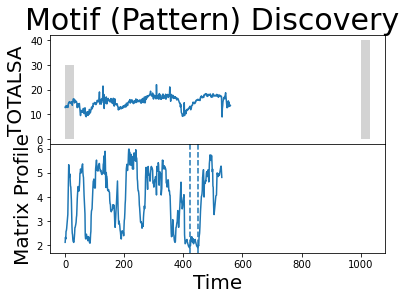

In [17]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')
axs[0].plot(cars['TOTALSA'].values)
axs[0].set_ylabel('TOTALSA', fontsize='20')
rect = Rectangle((0, 0), m, 30, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((1000, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=421, linestyle="dashed")
axs[1].axvline(x=449, linestyle="dashed")
axs[1].plot(mp[:, 0])

In [18]:
mp[:, 0].min()

1.8909397561311336

In [ ]:
print(f"The discord is located at index {discord_idx}")


In [ ]:
train_size = .80
n = cars.shape[0]
validate_s = .20
test_start_index = round(train_size * n)

train = cars[:test_start_index] # everything up (not including) to the test_start_index
validate = cars[:test_start_index]
test = cars[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

AttributeError: 'DataFrame' object has no attribute 'temp'

<AxesSubplot:xlabel='DATE'>

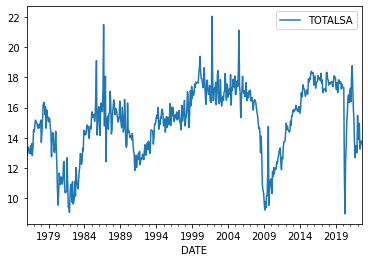

In [ ]:
#by_date = df.groupby(['sale_date']).sale_amount.sum().reset_index()
cars.plot(x='DATE', y='TOTALSA')

In [ ]:
# def rolling_forecast_origin (train, min_train, horizon):

#     for i in range(len(train) - min_train - horizon + 1):
#         split_train = train[:min_train+1]
#         split_val = train[min_train+1:min_train + 1 + horizon]
#         yield split_train, split_val


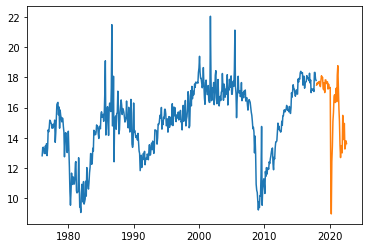

In [9]:
train_size = .90
n = cars.shape[0]
test_start_index = round(train_size * n)

train = cars[:test_start_index] # everything up (not including) to the test_start_index
test = cars[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.TOTALSA)
plt.plot(test.index, test.TOTALSA)

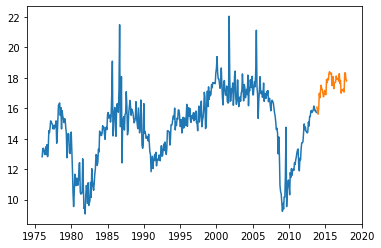

In [10]:
train_size = .90
n = train.shape[0]
validate_start_index = round(train_size * n)

train = cars[:validate_start_index] # everything up (not including) to the test_start_index
validate = cars[validate_start_index:test_start_index ] # everything from the test_start_index to the end

plt.plot(train.index, train.TOTALSA)
plt.plot(validate.index, validate.TOTALSA)

In [11]:
validate.shape

(50, 1)

In [12]:
test.shape

(56, 1)

In [13]:
train.shape

(454, 1)

In [11]:
train, validate, test = prep.time_series_split(cars)

In [12]:
train.shape, validate.shape, test.shape

((454, 1), (50, 1), (56, 1))